In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier

In [3]:
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [4]:
df = pd.read_excel('//10.0.7.226/IPBA Batch 6/Bridge i2i.xlsx')

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Data Accuracy
1. Statistics of Dataset(mean,median,Std Dev., etc)
2. Missing Values & Outliers in Datasets
3. Missing Value Treatment (Done in the next file)

In [7]:
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_NAME_6_F,CORE_COURSE_GRADE_6_F,SECOND_TERM,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,CORE_COURSE_NAME_4_S,CORE_COURSE_GRADE_4_S,CORE_COURSE_NAME_5_S,CORE_COURSE_GRADE_5_S,CORE_COURSE_NAME_6_S,CORE_COURSE_GRADE_6_S,HOUSING_STS,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,HIGH_SCHL_NAME,FATHER_HI_EDU_CD,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,1150.0,200708,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,NaN,NaN,NaN,NaN,200802,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,ITDS 2749,A,NaN,NaN,NaN,NaN,On Campus,0,150.0,4.00,SCHOOL 50,NaN,No Information,NaN,No Information,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,1190.0,200808,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,THEA 1100,A,POLS 1101,A,200902,ECON 2105,A,ENGL 1102,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off Campus,1,69.0,2.89,SCHOOL 389,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,1030.0,201008,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,SOCI 1101,A,NaN,NaN,201102,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,NaN,NaN,NaN,NaN,NaN,NaN,On Campus,1,150.0,3.39,SCHOOL 82,2.0,High School,4.0,Other/Unknown,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,1220.0,200708,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200802,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,MUSC 1100,A,NaN,NaN,NaN,NaN,On Campus,1,150.0,2.93,SCHOOL 180,3.0,College/Beyond,3.0,College/Beyond,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,1190.0,200808,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,NaN,NaN,NaN,NaN,200902,COMM 1110,A,ENGL 1101,A,HIST 2111,A,PSYC 1101,A,NaN,NaN,NaN,NaN,Off Campus,1,69.0,3.86,SCHOOL 2,3.0,College/Beyond,2.0,High School,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


**Shape of Dataset**

In [8]:
df.shape

(3400, 56)

**Different Datatypes present**

In [9]:
df.dtypes

STUDENT IDENTIFIER            int64
STDNT_AGE                     int64
STDNT_GENDER                 object
STDNT_BACKGROUND             object
IN_STATE_FLAG                object
INTERNATIONAL_STS            object
STDNT_MAJOR                  object
STDNT_MINOR                  object
STDNT_TEST_ENTRANCE1        float64
STDNT_TEST_ENTRANCE2        float64
STDNT_TEST_ENTRANCE_COMB    float64
FIRST_TERM                    int64
CORE_COURSE_NAME_1_F         object
CORE_COURSE_GRADE_1_F        object
CORE_COURSE_NAME_2_F         object
CORE_COURSE_GRADE_2_F        object
CORE_COURSE_NAME_3_F         object
CORE_COURSE_GRADE_3_F        object
CORE_COURSE_NAME_4_F         object
CORE_COURSE_GRADE_4_F        object
CORE_COURSE_NAME_5_F         object
CORE_COURSE_GRADE_5_F        object
CORE_COURSE_NAME_6_F         object
CORE_COURSE_GRADE_6_F        object
SECOND_TERM                   int64
CORE_COURSE_NAME_1_S         object
CORE_COURSE_GRADE_1_S        object
CORE_COURSE_NAME_2_S        

**Replacing 0s with 1s and 1s with 0s**

In [6]:
df['RETURNED_2ND_YR']=df['RETURNED_2ND_YR'].replace({0:1,1:0})

In [7]:
df['RETURNED_2ND_YR'].value_counts()

0    2677
1     723
Name: RETURNED_2ND_YR, dtype: int64

## Exploratory Data Analysis

#### Visualizing the dropout rate across different Degree Groups 

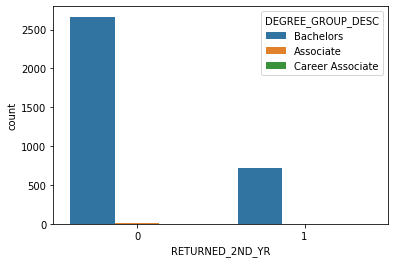

In [12]:
sns.countplot(x='RETURNED_2ND_YR',hue ='DEGREE_GROUP_DESC',data = df)

#### Percentage of dropout students across different programs 

In [13]:
dropout_per = df['DEGREE_GROUP_DESC'].value_counts()/len(df.RETURNED_2ND_YR)*100
dropout_per

Bachelors           99.529412
Associate            0.352941
Career Associate     0.117647
Name: DEGREE_GROUP_DESC, dtype: float64

### Analysing Gender Distribution of Students across different programs and its dropout rate among different genders

**Gender Ratio**

In [14]:
ratio = df['STDNT_GENDER'].value_counts(normalize= True)*100
print(round(ratio,1))

F    62.9
M    37.1
Name: STDNT_GENDER, dtype: float64


In [15]:
rf = pd.get_dummies(df.STDNT_GENDER)
rd = pd.get_dummies(df.DEGREE_GROUP_DESC)

In [16]:
degree_gender = pd.concat([rd,rf],axis =1)

### Number of male and female candidates in different degree program 

In [17]:
degree_gender.groupby(['F','M']).sum()

,,Associate,Bachelors,Career Associate
F,M,,,
0,1,2.0,1255.0,3.0
1,0,10.0,2129.0,1.0


In [18]:
rm = df['RETURNED_2ND_YR']

In [19]:
dependent = pd.concat([rm,degree_gender],axis =1)

### Relationship established between Dropout rate ~ gender and degree Program

In [20]:
rt = dependent.groupby(['RETURNED_2ND_YR']).sum()
rt

,Associate,Bachelors,Career Associate,F,M
RETURNED_2ND_YR,,,,,
0,10.0,2664.0,3.0,1665.0,1012.0
1,2.0,720.0,1.0,475.0,248.0


#### Here we see that the maximum number of dropouts are from Bachelor's program approx 99% in which
    - Female dropouts are around 66%
    - Male dropouts are around 34%

## Relationship between dropout rate and education of father and mother

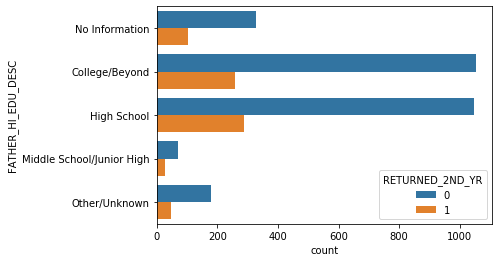

In [21]:
sns.countplot(y='FATHER_HI_EDU_DESC', hue = 'RETURNED_2ND_YR', data = df)

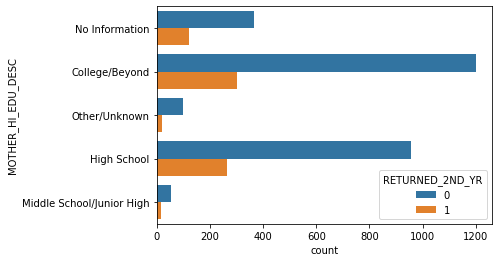

In [22]:
sns.countplot(y='MOTHER_HI_EDU_DESC', hue = 'RETURNED_2ND_YR', data = df)

## Relationship Between Dropout rate ~ gender and father's education 

In [23]:
yt = pd.get_dummies(df.FATHER_HI_EDU_DESC)

In [24]:
mx = pd.concat([yt,rf,rm], axis=1)

In [25]:
Gen_drop = mx.groupby(['RETURNED_2ND_YR','F']).sum()
Gen_drop

College/Beyond  High School  Middle School/Junior High  \
RETURNED_2ND_YR F                                                           
0               0           420.0        372.0                       24.0   
                1           632.0        675.0                       47.0   
1               0           102.0         88.0                        4.0   
                1           155.0        201.0                       22.0   

                   No Information  Other/Unknown       M  
RETURNED_2ND_YR F                                         
0               0           141.0           55.0  1012.0  
                1           188.0          123.0     0.0  
1               0            40.0           14.0   248.0  
                1            63.0           34.0     0.0

### Analysis shows that:
#### - For maximum Female candidates who dropped out of school, their Father's Education is upto High School
#### - For maximum Male candidates who dropped out of school, their Father's Education is College and Beyond

## Relation betweeen Student Dropout and Unmet Financial Needs 

In [26]:
df.groupby('RETURNED_2ND_YR')['UNMET_NEED'].sum()

RETURNED_2ND_YR
0    179988505.8
1     65561250.0
Name: UNMET_NEED, dtype: float64

In [27]:
df.groupby('RETURNED_2ND_YR')['UNMET_NEED'].describe()

,count,mean,std,min,25%,50%,75%,max
RETURNED_2ND_YR,,,,,,,,
0,2677.0,67235.153455,271065.565939,-1212072.0,0.0,0.0,179400.0,1414320.0
1,723.0,90679.460581,308520.936824,-948120.0,0.0,0.0,225870.0,1632660.0


#### 1- Average Unmet Financial Needs of Dropout Students 
#### 0- Average Unmet Financial Needs of Non Dropout Students 

### This clearly states that students who are dropping out have average high financial unmet need when compared to those who are staying back 

### Relationship between Dropout Students ~ Unmet Needs and their Background

In [28]:
df.groupby(['STDNT_BACKGROUND','RETURNED_2ND_YR'])['UNMET_NEED'].describe()

count           mean            std  \
STDNT_BACKGROUND RETURNED_2ND_YR                                         
BGD 1            0                1605.0   38088.042991  265918.278340   
                 1                 477.0   50823.522013  296320.001082   
BGD 2            0                  82.0   90708.841463  279516.213382   
                 1                  24.0   78612.500000  369261.868471   
BGD 3            0                 777.0  124728.484942  260600.109741   
                 1                 170.0  211738.764706  317467.544572   
BGD 4            0                 113.0   78307.247788  312343.915784   
                 1                  26.0   26951.538462  231519.753986   
BGD 5            0                   4.0       0.000000       0.000000   
                 1                   4.0       0.000000       0.000000   
BGD 6            0                  80.0   59157.750000  291533.872240   
                 1                  14.0   79757.142857  297620.435801   
BGD 7            0                  12.0   33710.000000  369695.568666   
                 1                   7.0  162882.857143  338629.543982   
BGD 8            0                   4.0  129795.000000  572733.809112   
                 1                   1.0  478620.000000            NaN   

                                        min       25%       50%       75%  \
STDNT_BACKGROUND RETURNED_2ND_YR                                            
BGD 1            0               -1212072.0       0.0       0.0   42900.0   
                 1                -948120.0       0.0       0.0   96660.0   
BGD 2            0                -597120.0       0.0       0.0  171690.0   
                 1                -638160.0       0.0       0.0  233460.0   
BGD 3            0                -921300.0       0.0       0.0  298994.4   
                 1                -433500.0       0.0       0.0  411606.0   
BGD 4            0                -672720.0       0.0       0.0  217740.0   
                 1                -417420.0  -67500.0       0.0   94905.0   
BGD 5            0                      0.0       0.0       0.0       0.0   
                 1                      0.0       0.0       0.0       0.0   
BGD 6            0               -1157640.0       0.0       0.0  107460.0   
                 1                -347580.0       0.0       0.0       0.0   
BGD 7            0                -347580.0  -81720.0       0.0   41940.0   
                 1                -155280.0       0.0       0.0  287610.0   
BGD 8            0                -417420.0 -104355.0       0.0  234150.0   
                 1                 478620.0  478620.0  478620.0  478620.0   

                                        max  
STDNT_BACKGROUND RETURNED_2ND_YR             
BGD 1            0                1216980.0  
                 1                1478400.0  
BGD 2            0                 944040.0  
                 1                 837720.0  
BGD 3            0                1414320.0  
                 1                1632660.0  
BGD 4            0                 949560.0  
                 1                 577620.0  
BGD 5            0                      0.0  
                 1                      0.0  
BGD 6            0                 919740.0  
                 1                 687600.0  
BGD 7            0                1059480.0  
                 1                 720240.0  
BGD 8            0                 936600.0  
                 1                 478620.0

In [29]:
df.groupby(['STDNT_BACKGROUND','RETURNED_2ND_YR'])['UNMET_NEED'].sum()

STDNT_BACKGROUND  RETURNED_2ND_YR
BGD 1             0                  61131309.0
                  1                  24242820.0
BGD 2             0                   7438125.0
                  1                   1886700.0
BGD 3             0                  96914032.8
                  1                  35995590.0
BGD 4             0                   8848719.0
                  1                    700740.0
BGD 5             0                         0.0
                  1                         0.0
BGD 6             0                   4732620.0
                  1                   1116600.0
BGD 7             0                    404520.0
                  1                   1140180.0
BGD 8             0                    519180.0
                  1                    478620.0
Name: UNMET_NEED, dtype: float64

## Relationship between Student Dropout ~ Course fee of college 

In [30]:
df.groupby(['STDNT_BACKGROUND','RETURNED_2ND_YR'])['COST_OF_ATTEND'].describe()

count           mean            std  \
STDNT_BACKGROUND RETURNED_2ND_YR                                         
BGD 1            0                1605.0  538188.710280  606219.099025   
                 1                 477.0  523883.522013  592391.461092   
BGD 2            0                  82.0  455423.414634  588637.130384   
                 1                  24.0  575910.000000  607178.155648   
BGD 3            0                 777.0  581363.938224  619786.404486   
                 1                 170.0  610633.058824  605914.222840   
BGD 4            0                 113.0  710528.495575  594084.931421   
                 1                  26.0  551127.692308  552006.459675   
BGD 5            0                   4.0       0.000000       0.000000   
                 1                   4.0       0.000000       0.000000   
BGD 6            0                  80.0  437335.500000  562816.528119   
                 1                  14.0  714192.857143  614972.140988   
BGD 7            0                  12.0  593830.000000  685062.906123   
                 1                   7.0  592122.857143  739226.148656   
BGD 8            0                   4.0  750945.000000  721371.782162   
                 1                   1.0  955500.000000            NaN   

                                       min       25%       50%        75%  \
STDNT_BACKGROUND RETURNED_2ND_YR                                            
BGD 1            0                     0.0       0.0       0.0  1201500.0   
                 1                     0.0       0.0  150540.0  1176420.0   
BGD 2            0                     0.0       0.0       0.0  1176420.0   
                 1                     0.0       0.0  249900.0  1201830.0   
BGD 3            0                     0.0       0.0  108960.0  1236960.0   
                 1                     0.0       0.0  829950.0  1176420.0   
BGD 4            0                     0.0       0.0  939000.0  1255740.0   
                 1                     0.0       0.0  348570.0  1008150.0   
BGD 5            0                     0.0       0.0       0.0        0.0   
                 1                     0.0       0.0       0.0        0.0   
BGD 6            0                     0.0       0.0       0.0  1147725.0   
                 1                     0.0       0.0  963960.0  1264380.0   
BGD 7            0                     0.0       0.0  163440.0  1310640.0   
                 1                     0.0       0.0       0.0  1363380.0   
BGD 8            0                     0.0  201825.0  792840.0  1341960.0   
                 1                955500.0  955500.0  955500.0   955500.0   

                                        max  
STDNT_BACKGROUND RETURNED_2ND_YR             
BGD 1            0                2082900.0  
                 1                2124900.0  
BGD 2            0                1504980.0  
                 1                1417380.0  
BGD 3            0                1862040.0  
                 1                1804860.0  
BGD 4            0                1504980.0  
                 1                1418100.0  
BGD 5            0                      0.0  
                 1                      0.0  
BGD 6            0                1504980.0  
                 1                1418100.0  
BGD 7            0                1504980.0  
                 1                1418100.0  
BGD 8            0                1418100.0  
                 1                 955500.0

### Analysis shows that:

1)The dropout number is high among backgrounds : BGD1, BGD3, BGD6

2)There's a huge difference between average course fee of Students who dropped out from backgrounds : BGD3, BGD6

#### High Course fee could be a possible reason for student's attrition 

## Relationship between Student Dropout ~ High School Grades

In [31]:
dt = df[['RETURNED_2ND_YR','HIGH_SCHL_GPA']]

In [32]:
dt.head()

,RETURNED_2ND_YR,HIGH_SCHL_GPA
0,1,4.00
1,0,2.89
2,0,3.39
3,0,2.93
4,0,3.86


In [33]:
dt.isnull().sum()

RETURNED_2ND_YR     0
HIGH_SCHL_GPA      53
dtype: int64

In [34]:
dt.shape

(3400, 2)

In [35]:
dt_new = dt.dropna(axis = 0)

In [36]:
dt_new.shape

(3347, 2)

In [37]:
dt_new['Grade_Score'] = dt_new['HIGH_SCHL_GPA'].map(lambda x: 'low_grades' if x < 2 else 'good'if 2 < x < 3 else 'high_score')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
dt_new['Grade_Score'].head()

0    high_score
1          good
2    high_score
3          good
4    high_score
Name: Grade_Score, dtype: object

In [39]:
dt_new['HIGH_SCHL_GPA'].head()

0    4.00
1    2.89
2    3.39
3    2.93
4    3.86
Name: HIGH_SCHL_GPA, dtype: float64

In [41]:
dt_new.groupby(['RETURNED_2ND_YR','Grade_Score']).count()

HIGH_SCHL_GPA
RETURNED_2ND_YR Grade_Score               
0               good                   788
                high_score            1848
                low_grades               3
1               good                   252
                high_score             455
                low_grades               1

### Analysis shows that :
#### Among the dropouts around 64% are the students who have scored high in their School 

## Analysis of best candidates from different Background for scholarships 

In [47]:
stu_back = df['STDNT_BACKGROUND']

In [48]:
best_stu = pd.concat([dt_new,stu_back], axis =1)

In [49]:
best_stu.groupby(['RETURNED_2ND_YR','Grade_Score','STDNT_BACKGROUND']).count()

HIGH_SCHL_GPA
RETURNED_2ND_YR Grade_Score STDNT_BACKGROUND               
0.0             good        BGD 1                       422
                            BGD 2                        21
                            BGD 3                       288
                            BGD 4                        36
                            BGD 6                        18
                            BGD 7                         2
                            BGD 8                         1
                high_score  BGD 1                      1153
                            BGD 2                        58
                            BGD 3                       485
                            BGD 4                        74
                            BGD 5                         4
                            BGD 6                        61
                            BGD 7                        10
                            BGD 8                         3
                low_grades  BGD 1                         1
                            BGD 3                         1
                            BGD 4                         1
1.0             good        BGD 1                       151
                            BGD 2                         8
                            BGD 3                        77
                            BGD 4                        10
                            BGD 6                         4
                            BGD 7                         2
                high_score  BGD 1                       313
                            BGD 2                        14
                            BGD 3                        92
                            BGD 4                        16
                            BGD 5                         4
                            BGD 6                        10
                            BGD 7                         5
                            BGD 8                         1
                low_grades  BGD 2                         1

### Analysis shows that :
#### A huge percentage of students from each background fall under high_score category who can be retained by introducing various schemes including scholarship programs especially from backgrounds *BGD1, BGD3,  and BGD6*

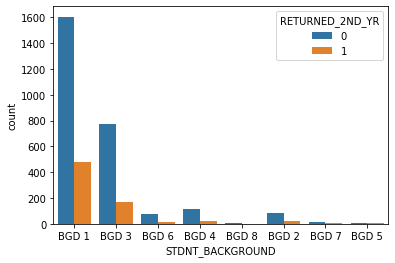

In [104]:
sns.countplot(hue='RETURNED_2ND_YR',x = 'STDNT_BACKGROUND',data =df)

### Analysis points out that :
    - Among Dropout Students, Students from background BGD1,BGD3,BGD7 & BGD8 have high avg unmet financial need 
    - BGD1 and BGD3 students have the highest attrition rate.

## Relationship between Dropout rate ~ Student Background and Gross Financial Need of Student

In [29]:
df.groupby(['STDNT_BACKGROUND','RETURNED_2ND_YR'])['GROSS_FIN_NEED'].count()

STDNT_BACKGROUND  RETURNED_2ND_YR
BGD 1             0                  1605
                  1                   477
BGD 2             0                    82
                  1                    24
BGD 3             0                   777
                  1                   170
BGD 4             0                   113
                  1                    26
BGD 5             0                     4
                  1                     4
BGD 6             0                    80
                  1                    14
BGD 7             0                    12
                  1                     7
BGD 8             0                     4
                  1                     1
Name: GROSS_FIN_NEED, dtype: int64

In [30]:
df.groupby(['STDNT_BACKGROUND','RETURNED_2ND_YR'])['GROSS_FIN_NEED'].mean()

STDNT_BACKGROUND  RETURNED_2ND_YR
BGD 1             0                  244458.691589
                  1                  251949.308176
BGD 2             0                  263836.097561
                  1                  283595.000000
BGD 3             0                  416728.339768
                  1                  486377.894118
BGD 4             0                  400027.964602
                  1                  210590.769231
BGD 5             0                       0.000000
                  1                       0.000000
BGD 6             0                  268786.500000
                  1                  274842.857143
BGD 7             0                  293240.000000
                  1                  365665.714286
BGD 8             0                  354525.000000
                  1                  583620.000000
Name: GROSS_FIN_NEED, dtype: float64

#### Looking at the figures we may say that :
    -Student who dropped out from different Backgrounds have higher average Gross Financial Need than those who did not drop out

#### 1- Dropout, 0 - Returned 

## Missing Values

In [8]:
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

**percentage of missing values in each column**

In [9]:
missing_value_per = df.isnull().sum()/df.shape[0] *100
missing_value_per

STUDENT IDENTIFIER           0.000000
STDNT_AGE                    0.000000
STDNT_GENDER                 0.000000
STDNT_BACKGROUND             0.000000
IN_STATE_FLAG                0.000000
INTERNATIONAL_STS            0.000000
STDNT_MAJOR                  0.000000
STDNT_MINOR                  0.000000
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
STDNT_TEST_ENTRANCE_COMB    15.235294
FIRST_TERM                   0.000000
CORE_COURSE_NAME_1_F         0.000000
CORE_COURSE_GRADE_1_F        0.000000
CORE_COURSE_NAME_2_F         2.911765
CORE_COURSE_GRADE_2_F        2.911765
CORE_COURSE_NAME_3_F        16.617647
CORE_COURSE_GRADE_3_F       16.617647
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_1_S         4.617647
CORE_COURSE_

### Missing Value Treatment 

#### Missing Value Treatment of following columns 
1. STDNT_TEST_ENTRANCE_COMB - imputed missing values with median values of marks scored in each Student Major Subjects
2. SECOND_TERM_ATTEMPT_HRS - imputed missing values with median values of marks scored in each Student Major Subjects
3. SECOND_TERM_EARNED_HRS - imputed missing values with 0

In [10]:
df['STDNT_TEST_ENTRANCE_COMB']=df['STDNT_TEST_ENTRANCE_COMB'].fillna(df.groupby(['STDNT_MAJOR'])['STDNT_TEST_ENTRANCE_COMB'].transform('median'))
df['SECOND_TERM_ATTEMPT_HRS']=df['SECOND_TERM_ATTEMPT_HRS'].fillna(df.groupby(['STDNT_MAJOR'])['SECOND_TERM_ATTEMPT_HRS'].transform('median'))
df['SECOND_TERM_EARNED_HRS'] = df['SECOND_TERM_EARNED_HRS'].fillna(0)

### Creating two more variables of percentage attendance by students in first and second term 

In [11]:
df['First_Term_Per'] = df['FIRST_TERM_EARNED_HRS']/df['FIRST_TERM_ATTEMPT_HRS'] * 100
df['Second_Term_Per'] = df['SECOND_TERM_EARNED_HRS']/df['SECOND_TERM_ATTEMPT_HRS'] *100

#### Selecting and treating variables with less than 60% data missing for model building 

In [12]:
missing_value_per = df.isnull().sum()/df.shape[0] *100
missing_value_per

STUDENT IDENTIFIER           0.000000
STDNT_AGE                    0.000000
STDNT_GENDER                 0.000000
STDNT_BACKGROUND             0.000000
IN_STATE_FLAG                0.000000
INTERNATIONAL_STS            0.000000
STDNT_MAJOR                  0.000000
STDNT_MINOR                  0.000000
STDNT_TEST_ENTRANCE1        67.470588
STDNT_TEST_ENTRANCE2        26.705882
STDNT_TEST_ENTRANCE_COMB     0.000000
FIRST_TERM                   0.000000
CORE_COURSE_NAME_1_F         0.000000
CORE_COURSE_GRADE_1_F        0.000000
CORE_COURSE_NAME_2_F         2.911765
CORE_COURSE_GRADE_2_F        2.911765
CORE_COURSE_NAME_3_F        16.617647
CORE_COURSE_GRADE_3_F       16.617647
CORE_COURSE_NAME_4_F        46.970588
CORE_COURSE_GRADE_4_F       46.970588
CORE_COURSE_NAME_5_F        81.029412
CORE_COURSE_GRADE_5_F       81.029412
CORE_COURSE_NAME_6_F        96.235294
CORE_COURSE_GRADE_6_F       96.235294
SECOND_TERM                  0.000000
CORE_COURSE_NAME_1_S         4.617647
CORE_COURSE_

In [13]:
df = df.drop(['CORE_COURSE_NAME_4_S','CORE_COURSE_GRADE_4_S', 'CORE_COURSE_NAME_5_S', 
              'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_NAME_6_S', 'CORE_COURSE_GRADE_6_S',
              'CORE_COURSE_NAME_5_F','CORE_COURSE_GRADE_5_F','CORE_COURSE_NAME_6_F','CORE_COURSE_GRADE_6_F',
             'DEGREE_GROUP_DESC','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','STDNT_TEST_ENTRANCE1','STDNT_TEST_ENTRANCE2' ],axis=1)

### Missing Value Treatment of Remaining Numerical & Object Type Variables Separately 

In [14]:
df1 = df.select_dtypes(include=[np.number])
df2 = df.select_dtypes(include=[object])

## Data Audit Report

In [15]:
def var_summary(x):
    return pd.Series([x.count(),x.isnull().sum(),x.sum(),x.mean(),x.median(),x.std(),x.var(),x.min(),x.dropna().quantile(0.01),x.dropna().quantile(0.05),x.dropna().quantile(0.1),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75),x.dropna().quantile(0.90),x.dropna().quantile(0.95),x.dropna().quantile(0.99),x.dropna().quantile(0.999),x.max()],
                    index = ['N','NMISS','SUM','MEAN','MEDIAN','STD','VAR','MIN','P1','P5','P10','P25','P50','P75','P90','P95','P99','P99.9','MAX'])

df1.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,P99.9,MAX
STUDENT IDENTIFIER,3400.0,0.0,2.685033e+10,7.897155e+06,7899052.5,80834.212657,6.534170e+09,7755837.0,7.758281e+06,7769818.35,7.785577e+06,7827039.25,7899052.5,7964008.00,8008284.10,8023323.55,8034112.56,8.036666e+06,8.037098e+06
STDNT_AGE,3400.0,0.0,6.118000e+04,1.799412e+01,18.0,0.552052,3.047609e-01,16.0,1.700000e+01,17.00,1.800000e+01,18.00,18.0,18.00,18.00,19.00,19.00,2.460100e+01,2.600000e+01
STDNT_TEST_ENTRANCE_COMB,3400.0,0.0,3.391030e+06,9.973618e+02,990.0,145.136548,2.106462e+04,530.0,5.300000e+02,790.00,8.700000e+02,910.00,990.0,1070.00,1190.00,1220.00,1340.00,1.420000e+03,1.510000e+03
FIRST_TERM,3400.0,0.0,6.826418e+08,2.007770e+05,200808.0,170.001298,2.890044e+04,200508.0,2.005080e+05,200508.00,2.005080e+05,200608.00,200808.0,200908.00,201008.00,201008.00,201008.00,2.010080e+05,2.010080e+05
SECOND_TERM,3400.0,0.0,6.829614e+08,2.008710e+05,200902.0,170.001298,2.890044e+04,200602.0,2.006020e+05,200602.00,2.006020e+05,200702.00,200902.0,201002.00,201102.00,201102.00,201102.00,2.011020e+05,2.011020e+05
RETURNED_2ND_YR,3400.0,0.0,7.230000e+02,2.126471e-01,0.0,0.409240,1.674775e-01,0.0,0.000000e+00,0.00,0.000000e+00,0.00,0.0,0.00,1.00,1.00,1.00,1.000000e+00,1.000000e+00
DISTANCE_FROM_HOME,3375.0,25.0,3.369100e+05,9.982519e+01,69.0,235.196984,5.531762e+04,0.0,0.000000e+00,0.00,0.000000e+00,69.00,69.0,138.00,150.00,188.00,666.00,4.501000e+03,5.932000e+03
HIGH_SCHL_GPA,3347.0,53.0,1.071956e+04,3.202738e+00,3.2,0.455337,2.073318e-01,0.0,2.174600e+00,2.46,2.600000e+00,2.87,3.2,3.56,3.81,3.93,4.00,4.000000e+00,4.000000e+00
FIRST_TERM_ATTEMPT_HRS,3400.0,0.0,4.755200e+04,1.398588e+01,14.0,1.554286,2.415805e+00,9.0,1.200000e+01,12.00,1.200000e+01,13.00,14.0,15.00,16.00,16.00,18.00,1.960100e+01,2.100000e+01
FIRST_TERM_EARNED_HRS,3400.0,0.0,4.149700e+04,1.220500e+01,13.0,2.986294,8.917951e+00,0.0,3.000000e+00,6.00,8.000000e+00,11.00,13.0,15.00,15.00,16.00,17.00,1.900000e+01,2.100000e+01


### Missing Value Treatment

**Numerical Variables**

In [16]:
imputer_num = SimpleImputer(missing_values =np.nan, strategy = 'median')
imputer_num = imputer_num.fit(df1)
df1_num = imputer_num.transform(df1)
df_imp_num = pd.DataFrame(df1_num, columns = df1.columns)
df_imp_num.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,First_Term_Per,Second_Term_Per
0,7808615.0,18.0,1150.0,200708.0,200802.0,1.0,150.0,4.00,16.0,16.0,14.0,14.0,0.0,0.0,0.0,0.0,100.0,100.0
1,7830063.0,19.0,1190.0,200808.0,200902.0,0.0,69.0,2.89,18.0,18.0,18.0,18.0,570000.0,1355760.0,785760.0,459300.0,100.0,100.0
2,7847538.0,18.0,1030.0,201008.0,201102.0,0.0,150.0,3.39,15.0,15.0,14.0,14.0,0.0,0.0,0.0,0.0,100.0,100.0
3,8006429.0,18.0,1220.0,200708.0,200802.0,0.0,150.0,2.93,13.0,13.0,14.0,14.0,0.0,0.0,0.0,0.0,100.0,100.0
4,7962680.0,18.0,1190.0,200808.0,200902.0,0.0,69.0,3.86,12.0,12.0,12.0,12.0,835920.0,1355760.0,519840.0,278340.0,100.0,100.0


**Categorical Variables**

In [17]:
df2.head()

,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,HOUSING_STS,HIGH_SCHL_NAME,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD
0,F,BGD 1,Y,N,Undeclared,N,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,On Campus,SCHOOL 50,No Information,No Information,B
1,F,BGD 1,N,N,Undeclared,N,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,ECON 2105,A,ENGL 1102,A,NaN,NaN,Off Campus,SCHOOL 389,College/Beyond,College/Beyond,B
2,M,BGD 1,Y,N,Mathematics,N,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,On Campus,SCHOOL 82,High School,Other/Unknown,B
3,M,BGD 1,Y,N,Undeclared,N,ANTH 1107,A,COMM 1110,A,NaN,NaN,NaN,NaN,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,On Campus,SCHOOL 180,College/Beyond,College/Beyond,B
4,F,BGD 1,Y,N,Art,N,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,COMM 1110,A,ENGL 1101,A,HIST 2111,A,Off Campus,SCHOOL 2,College/Beyond,High School,B


In [18]:
imputer_obj = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
imputer_obj = imputer_obj.fit(df2)
df_obj = imputer_obj.transform(df2)
df_imp_obj = pd.DataFrame(df_obj,columns=df2.columns)
df_imp_obj.head()

,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_GRADE_4_F,CORE_COURSE_NAME_1_S,CORE_COURSE_GRADE_1_S,CORE_COURSE_NAME_2_S,CORE_COURSE_GRADE_2_S,CORE_COURSE_NAME_3_S,CORE_COURSE_GRADE_3_S,HOUSING_STS,HIGH_SCHL_NAME,FATHER_HI_EDU_DESC,MOTHER_HI_EDU_DESC,DEGREE_GROUP_CD
0,F,BGD 1,Y,N,Undeclared,N,ANTH 1105,A,ARTH 1100,A,ENGL 1102,A,PSYC 1101,A,CHEM 1151,A,CHEM 1151L,A,COMM 1110,A,On Campus,SCHOOL 50,No Information,No Information,B
1,F,BGD 1,N,N,Undeclared,N,ANTH 1105,A,GERM 1002,A,ITDS 2735,A,MATH 1125,A,ECON 2105,A,ENGL 1102,A,ENGL 1102,A,Off Campus,SCHOOL 389,College/Beyond,College/Beyond,B
2,M,BGD 1,Y,N,Mathematics,N,ANTH 1105,A,ENGL 1101,A,HIST 2111,A,MATH 1111,A,ENGL 1102,A,ENVS 1105,A,MUSC 1100,A,On Campus,SCHOOL 82,High School,Other/Unknown,B
3,M,BGD 1,Y,N,Undeclared,N,ANTH 1107,A,COMM 1110,A,ENGL 1101,B,ENGL 1101,A,ENGL 1102,A,HIST 2112,A,LEAD 1705,A,On Campus,SCHOOL 180,College/Beyond,College/Beyond,B
4,F,BGD 1,Y,N,Art,N,ANTH 1107,A,ARTH 1100,A,CPSC 1105,A,MATH 1111,A,COMM 1110,A,ENGL 1101,A,HIST 2111,A,Off Campus,SCHOOL 2,College/Beyond,High School,B


**Creating dummy variables**

In [19]:
def createdummies(df,colname):
    col_dummies = pd.get_dummies(df[colname],prefix=colname,drop_first=True)
    df = pd.concat([df,col_dummies],axis=1)
    df.drop([colname],axis=1,inplace=True)
    return df

In [20]:
for feature in df_imp_obj.columns.to_list():
    df_imp_obj[feature] = df_imp_obj[feature].astype('category')
    df_imp_obj = createdummies(df_imp_obj,feature)

Concatenating to form new dataframe 

In [21]:
df_new = pd.concat([df_imp_num,df_imp_obj],axis =1)

In [22]:
df_new.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,SECOND_TERM,RETURNED_2ND_YR,DISTANCE_FROM_HOME,HIGH_SCHL_GPA,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,First_Term_Per,Second_Term_Per,STDNT_GENDER_M,STDNT_BACKGROUND_BGD 2,STDNT_BACKGROUND_BGD 3,STDNT_BACKGROUND_BGD 4,STDNT_BACKGROUND_BGD 5,STDNT_BACKGROUND_BGD 6,STDNT_BACKGROUND_BGD 7,STDNT_BACKGROUND_BGD 8,IN_STATE_FLAG_Y,INTERNATIONAL_STS_Y,STDNT_MAJOR_Applied Computer Science,STDNT_MAJOR_Art,STDNT_MAJOR_Art Education,STDNT_MAJOR_Biology,STDNT_MAJOR_Biology and Secondary Ed,STDNT_MAJOR_Chemistry,STDNT_MAJOR_Chemistry and Secondary Ed,STDNT_MAJOR_Communication,STDNT_MAJOR_Computer Science - Games,STDNT_MAJOR_Computer Science - Systems,STDNT_MAJOR_Criminal Justice,STDNT_MAJOR_Early Admission - Accel,STDNT_MAJOR_Early Childhood Education,STDNT_MAJOR_Earth and Space Science,STDNT_MAJOR_Engineering Studies,STDNT_MAJOR_English Language/Literature,STDNT_MAJOR_English and Secondary Ed,STDNT_MAJOR_Exercise Science,STDNT_MAJOR_Finance,STDNT_MAJOR_French,STDNT_MAJOR_French with Teacher Cert,STDNT_MAJOR_General Business,STDNT_MAJOR_General Studies/AS,STDNT_MAJOR_Geology,STDNT_MAJOR_Health Science,STDNT_MAJOR_Health and Physical Education,STDNT_MAJOR_History,STDNT_MAJOR_History and Secondary Ed,STDNT_MAJOR_Information Technology,STDNT_MAJOR_Joint Enrollment - Accel,STDNT_MAJOR_Liberal Arts,STDNT_MAJOR_Management,STDNT_MAJOR_Management Information Systems,STDNT_MAJOR_Marketing,STDNT_MAJOR_Mathematics,STDNT_MAJOR_Mathematics and Secondary Ed,STDNT_MAJOR_Middle Grades Education,STDNT_MAJOR_Music,STDNT_MAJOR_Music Education,STDNT_MAJOR_Music Performance,STDNT_MAJOR_Nursing,STDNT_MAJOR_Political Science,STDNT_MAJOR_Pre-Business,STDNT_MAJOR_Pre-Engineering/RETP,STDNT_MAJOR_Pre-Nursing,STDNT_MAJOR_Psychology,STDNT_MAJOR_Sociology,STDNT_MAJOR_Spanish,STDNT_MAJOR_Spanish with Teacher Cert,STDNT_MAJOR_Spec Ed: Gen. Curr. - Reading,STDNT_MAJOR_Theatre Arts,STDNT_MAJOR_Theatre Education,STDNT_MAJOR_Undeclared,STDNT_MINOR_African Studies,STDNT_MINOR_Anthropology,STDNT_MINOR_Art,STDNT_MINOR_Art History,STDNT_MINOR_Asian Studies,STDNT_MINOR_Biology,STDNT_MINOR_Chemistry,STDNT_MINOR_Communication,STDNT_MINOR_Computer Info. Management,STDNT_MINOR_Computer Science - Systems,STDNT_MINOR_Creative Writing,STDNT_MINOR_Criminal Justice,STDNT_MINOR_Early Childhood Education,STDNT_MINOR_Economics,STDNT_MINOR_English Language/Literature,STDNT_MINOR_Exercise Science,STDNT_MINOR_Finance,STDNT_MINOR_Foundations of Business,STDNT_MINOR_French,STDNT_MINOR_Health Science,STDNT_MINOR_History,STDNT_MINOR_International Business,STDNT_MINOR_Management,STDNT_MINOR_Marketing,STDNT_MINOR_Mathematics,STDNT_MINOR_Military Sci & Adv Leadership,STDNT_MINOR_Music,STDNT_MINOR_N,STDNT_MINOR_Philosophy,STDNT_MINOR_Political Science,STDNT_MINOR_Professional Writing,STDNT_MINOR_Psychology,STDNT_MINOR_Sociology,STDNT_MINOR_Spanish,STDNT_MINOR_Theatre Arts,STDNT_MINOR_Women's Studies,CORE_COURSE_NAME_1_F_ANTH 1105I,CORE_COURSE_NAME_1_F_ANTH 1107,CORE_COURSE_NAME_1_F_ARAB 1001,CORE_COURSE_NAME_1_F_ARTH 1100,CORE_COURSE_NAME_1_F_ARTH 1100I,CORE_COURSE_NAME_1_F_ASTR 1105,CORE_COURSE_NAME_1_F_ASTR 1305,CORE_COURSE_NAME_1_F_BIOL 1125,CORE_COURSE_NAME_1_F_BIOL 1215K,CORE_COURSE_NAME_1_F_CHEM 1151,CORE_COURSE_NAME_1_F_CHEM 1151L,CORE_COURSE_NAME_1_F_CHEM 1211,CORE_COURSE_NAME_1_F_CHEM 1211L,CORE_COURSE_NAME_1_F_COMM 1110,CORE_COURSE_NAME_1_F_COMM 1110H,CORE_COURSE_NAME_1_F_COMM 1110I,CORE_COURSE_NAME_1_F_CPSC 1105,CORE_COURSE_NAME_1_F_CPSC 1301,CORE_COURSE_NAME_1_F_CPSC 1301L,CORE_COURSE_NAME_1_F_ECON 2105,CORE_COURSE_NAME_1_F_ECON 2106,CORE_COURSE_NAME_1_F_ENGL 1101,CORE_COURSE_NAME_1_F_ENGL 1101I,CORE_COURSE_NAME_1_F_ENGL 1102,CORE_COURSE_NAME_1_F_ENGL 2111,CORE_COURSE_NAME_1_F_ENVS 1105,CORE_COURSE_NAME_1_F_ENVS 1105I,CORE_COURSE_NAME_1_F_FREN 1001,CORE_COURSE_NAME_1_F_FREN 1002,CORE_COURSE_NAME_1_F_GEOG 1101I,CORE_

**Cleaning column names**

In [23]:
df_new.columns = df_new.columns.str.strip().str.replace(' ','_').str.replace('/','_')

In [24]:
df_new.isnull().sum()

STUDENT_IDENTIFIER                              0
STDNT_AGE                                       0
STDNT_TEST_ENTRANCE_COMB                        0
FIRST_TERM                                      0
SECOND_TERM                                     0
RETURNED_2ND_YR                                 0
DISTANCE_FROM_HOME                              0
HIGH_SCHL_GPA                                   0
FIRST_TERM_ATTEMPT_HRS                          0
FIRST_TERM_EARNED_HRS                           0
SECOND_TERM_ATTEMPT_HRS                         0
SECOND_TERM_EARNED_HRS                          0
GROSS_FIN_NEED                                  0
COST_OF_ATTEND                                  0
EST_FAM_CONTRIBUTION                            0
UNMET_NEED                                      0
First_Term_Per                                  0
Second_Term_Per                                 0
STDNT_GENDER_M                                  0
STDNT_BACKGROUND_BGD_2                          0


## Correlation

In [46]:
df_new.corr().to_csv('//10.0.7.226/IPBA Batch 6/corr.csv')

**Dropping variables with High Correlation**

In [25]:
df_new = df_new.drop(['FIRST_TERM'],axis=1)

## Model Building

In [26]:
X = df_new.drop(['RETURNED_2ND_YR'],axis=1)

In [27]:
y = df_new['RETURNED_2ND_YR']

In [28]:
print(X.shape)
print(y.shape)

(3400, 1084)
(3400,)


In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state =0)

In [30]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2720, 1084)
(680, 1084)
(2720,)
(680,)


In [35]:
cross_tab_train = pd.crosstab(index = y_train, columns='count')
cross_tab_test = pd.crosstab(index = y_test, columns='count')
cross_tab_train

col_0,count
RETURNED_2ND_YR,
0.0,2126
1.0,594


In [36]:
cross_tab_test

col_0,count
RETURNED_2ND_YR,
0.0,551
1.0,129


In [37]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [38]:
y_pred = logreg.predict(X_test)
print(y_test.head(),y_pred[0:5])

1450    0.0
1424    0.0
2424    0.0
678     0.0
3266    0.0
Name: RETURNED_2ND_YR, dtype: float64 [0. 0. 0. 0. 0.]


In [39]:
print("Model score is: ",logreg.score(X_test,y_test))

Model score is:  0.7705882352941177


In [40]:
mean_squared_error(y_test,y_pred)

0.22941176470588234

In [41]:
metrics.confusion_matrix(y_test,y_pred)

array([[479,  72],
       [ 84,  45]], dtype=int64)

#### Hyperparameter Tuning

In [49]:
grid = {'C':[0.001,0.01,0.1,1,10,100,1000],'penalty':['l1','l2','elasticnet']}
logreg_cv = GridSearchCV(LogisticRegression(),grid,cv=10)
logreg_cv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1302, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this trai

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1302, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [50]:
print('best parameters for logistic regression:',logreg_cv.best_params_)

best parameters for logistic regression: {'C': 0.001, 'penalty': 'l2'}


In [51]:
logreg_tuned = LogisticRegression(C = 0.001,penalty ='l2')
logreg_tuned.fit(X_train,y_train)
print('Tuned logistic Regression score:',logreg_tuned.score(X_test,y_test))

Tuned logistic Regression score: 0.8352941176470589


In [52]:
print(metrics.confusion_matrix(y_test,logreg_tuned.predict(X_test)))

[[545   6]
 [106  23]]


## Naive Bayes

In [32]:
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_train)

BernoulliNB()

In [33]:
print(metrics.confusion_matrix(y_test, nb_clf.predict(X_test)))

[[481  70]
 [ 72  57]]


In [34]:
metrics.accuracy_score(y_test, nb_clf.predict(X_test))

0.7911764705882353

## Decision Tree

In [57]:
clf_tree = DecisionTreeClassifier(max_depth=5)
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [58]:
pd.DataFrame(clf_tree.predict_proba(X_train)).head()

,0,1
0,0.855433,0.144567
1,0.855433,0.144567
2,0.855433,0.144567
3,0.855433,0.144567
4,0.672414,0.327586


In [59]:
pd.DataFrame(clf_tree.predict_proba(X_train))[1]

0       0.144567
1       0.144567
2       0.144567
3       0.144567
4       0.327586
5       0.913043
6       0.913043
7       0.144567
8       0.144567
9       0.144567
10      0.144567
11      0.144567
12      0.144567
13      0.144567
14      0.144567
15      0.297872
16      0.913043
17      0.272727
18      0.144567
19      0.144567
20      0.144567
21      0.144567
22      0.913043
23      0.085714
24      0.085714
25      0.038462
26      0.144567
27      0.144567
28      0.913043
29      0.144567
30      0.913043
31      0.144567
32      0.144567
33      0.144567
34      0.327586
35      0.144567
36      0.144567
37      0.144567
38      0.144567
39      0.144567
40      0.144567
41      0.327586
42      0.913043
43      0.144567
44      0.144567
45      0.144567
46      0.144567
47      0.144567
48      0.144567
49      0.144567
50      0.144567
51      0.144567
52      0.144567
53      0.144567
54      0.144567
55      0.144567
56      0.144567
57      0.144567
58      0.1445

In [63]:
pred_tree = pd.DataFrame({'actual':y_train,
                         'predicted':clf_tree.predict(X_train)})
pred_tree.head()

,actual,predicted
596,0.0,0.0
1396,0.0,0.0
235,1.0,0.0
2577,0.0,0.0
2564,1.0,0.0


In [64]:
pred_tree_test = pd.DataFrame({'actual':y_test,
                         'predicted':clf_tree.predict(X_test)})
pred_tree_test.head()

,actual,predicted
1450,0.0,0.0
1424,0.0,0.0
2424,0.0,0.0
678,0.0,0.0
3266,0.0,0.0


In [65]:
print("Train Accuracy - ")
print(metrics.accuracy_score(pred_tree.actual, pred_tree.predicted))

print("Test Accuracy - ")
print(metrics.accuracy_score(pred_tree_test.actual, pred_tree_test.predicted))

Train Accuracy - 
0.8466911764705882
Test Accuracy - 
0.8279411764705882


In [66]:
pred_prob_df = pd.DataFrame(clf_tree.predict_proba(X_train))
pred_prob_df.columns = ["Not Attrited", "Attrited"]
pred_prob_df.head()

,Not Attrited,Attrited
0,0.855433,0.144567
1,0.855433,0.144567
2,0.855433,0.144567
3,0.855433,0.144567
4,0.672414,0.327586


In [67]:
print(metrics.roc_auc_score(y_train, pred_prob_df.Attrited))

0.7110680337397177


**Fine Tuning the parameters**

In [69]:
dt_par_grid = {'max_depth':np.arange(5,13),
              'max_features':[5,8,10,14,18,20]
              }

In [70]:
gscv_tree = GridSearchCV(DecisionTreeClassifier(), dt_par_grid, cv = 8)
gscv_tree.fit(X_train,y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12]),

In [71]:
gscv_tree.best_score_

0.80625

In [72]:
gscv_tree.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
gscv_tree.best_params_

{'max_depth': 11, 'max_features': 20}

### Building Final Decision Tree Model

In [76]:
clf_tree_tuned = DecisionTreeClassifier(max_depth= 11, max_features=20, random_state=12)
clf_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [77]:
clf_tree_pred_tune = pd.DataFrame({'actual': y_test, 'predicted':clf_tree_tuned.predict(X_test)})
metrics.accuracy_score(clf_tree_pred_tune.actual, clf_tree_pred_tune.predicted )

0.8294117647058824

In [84]:
test_pred_dt = pd.DataFrame({'actual':y_test, 'predicted':clf_tree_tuned.predict(X_test)})
test_pred_dt.sample(n = 10)

,actual,predicted
289,0.0,0.0
983,0.0,0.0
1276,0.0,0.0
1774,0.0,0.0
961,0.0,0.0
616,1.0,0.0
1637,0.0,0.0
643,1.0,0.0
1549,0.0,0.0
2950,0.0,0.0


In [85]:
metrics.accuracy_score(test_pred_dt.actual, test_pred_dt.predicted)

0.8294117647058824

In [86]:
print(metrics.confusion_matrix(test_pred_dt.actual, test_pred_dt.predicted))

[[537  14]
 [102  27]]


## Random Forest

In [72]:
random_forest = RandomForestClassifier(n_estimators=100,oob_score=True,bootstrap=True,max_features='auto',random_state=1)
random_forest.fit(X_train,y_train)
y_pred= random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.8426470588235294

In [73]:
print(metrics.confusion_matrix(y_test,y_pred))

[[539  12]
 [ 95  34]]


### Hyperparameter Tuning 

In [79]:
hyper = {'n_estimators' :[100,300,500,800,1200],
'max_depth' : [5,8,15,25,30],
'min_samples_split' : [2,5,10,15,100],
'min_samples_leaf' : [1,2,5,10]}

grid_rf = GridSearchCV(random_forest,hyper,cv = 3, verbose =1,n_jobs = -1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 67.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=1,
                                    

In [80]:
print(grid_rf.best_estimator_.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [81]:
opt_rf = RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0, class_weight= None, criterion= 'gini',
                                 max_depth= 15, max_features= 'auto', max_leaf_nodes= None, 
                                 max_samples= None, min_impurity_decrease= 0.0, min_impurity_split= None, 
                                 min_samples_leaf= 2, min_samples_split= 5, min_weight_fraction_leaf= 0.0, 
                                 n_estimators = 100, n_jobs = None, oob_score= True, random_state= 1, 
                                 verbose= 0, warm_start= False)
opt_model = opt_rf.fit(X_train,y_train)

In [82]:
print("Accuracy:",metrics.accuracy_score(y_test,opt_model.predict(X_test)))

Accuracy: 0.8455882352941176


In [83]:
confusion_matrix1 = confusion_matrix(y_test,opt_model.predict(X_test))
print(confusion_matrix1)

[[543   8]
 [ 97  32]]


### Important Features

In [84]:
names = X.columns
feature_importance = sorted(zip(names, map(lambda x: round(x,4), opt_rf.feature_importances_)),
                           key = lambda x: x[1],
                           reverse = True)

In [85]:
pd.DataFrame(feature_importance)

,0,1
0,SECOND_TERM_EARNED_HRS,0.1423
1,Second_Term_Per,0.0987
2,CORE_COURSE_GRADE_1_S_C,0.0241
3,CORE_COURSE_NAME_2_S_ENGL_1102,0.0239
4,STUDENT_IDENTIFIER,0.0223
5,UNMET_NEED,0.0208
6,FIRST_TERM_EARNED_HRS,0.0206
7,DISTANCE_FROM_HOME,0.0194
8,SECOND_TERM_ATTEMPT_HRS,0.0184
9,CORE_COURSE_GRADE_1_S_B,0.0179


## KNN Classifier

In [90]:
test_scores = []
train_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))    

In [91]:
max_test_score = max(test_scores)
test_scores_ind= [i for i,v in enumerate(test_scores) if v==max_test_score]
print('max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x :x+1, test_scores_ind))))

max test score 81.76470588235294 % and k = [13]


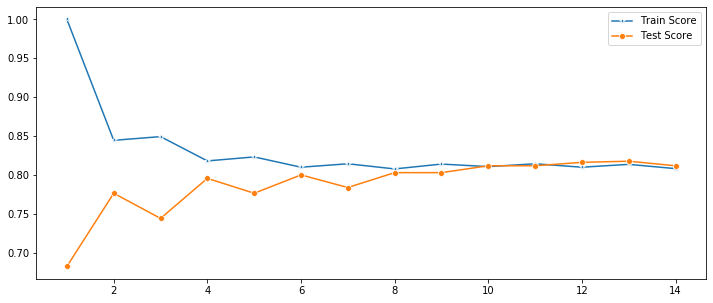

In [92]:
plt.figure(figsize=(12,5))
s = sns.lineplot(range(1,15),train_scores,marker ='*',label ='Train Score')
s = sns.lineplot(range(1,15),test_scores,marker ='o',label ='Test Score')

In [93]:
## Setting Knn classifier with k neighbors
knn = KNeighborsClassifier(13)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8176470588235294

In [94]:
print(metrics.confusion_matrix(y_test,knn.predict(X_test)))

[[539  12]
 [112  17]]


In [95]:
roc_auc_score(y_test,knn.predict(X_test))

0.5550021806722097

### Hyperparameter Tuning

In [96]:
param_grid = {'n_neighbors': np.arange(6,30)}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv =5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [97]:
print('Best Parameters:'+str(knn_cv.best_params_ ))

Best Parameters:{'n_neighbors': 12}


In [98]:
knn1 = KNeighborsClassifier(12)
knn1.fit(X_train,y_train)
knn1.score(X_test,y_test)

0.8161764705882353

In [99]:
roc_auc_score(y_test,knn1.predict(X_test))

0.5422206277522194

In [102]:
confusion_matrix(y_test,knn1.predict(X_test))

array([[542,   9],
       [116,  13]], dtype=int64)

## Boosting

### Gradient Boosting

In [94]:
gb = GradientBoostingClassifier(n_estimators =1000,learning_rate=0.01,random_state=1)
gb.fit(X_train,y_train)
print("Accuracy:",metrics.accuracy_score(y_test,gb.predict(X_test)))

Accuracy: 0.8426470588235294


In [95]:
print(confusion_matrix(y_test,gb.predict(X_test)))

[[536  15]
 [ 92  37]]


### Ada Boost

In [33]:
pargrid_ada = {'n_estimators':[100,200,400,600,800,1000,1500],
              'learning_rate':[10**x for x in range(-2,2)]}

In [34]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(),
                       param_grid=pargrid_ada,
                       cv = 6, verbose = True, n_jobs=-1)
gscv_ada.fit(X_train,y_train)

Fitting 6 folds for each of 28 candidates, totalling 168 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 168 out of 168 | elapsed: 49.5min finished


GridSearchCV(cv=6, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'n_estimators': [100, 200, 400, 600, 800, 1000, 1500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [35]:
gscv_ada.best_params_

{'learning_rate': 0.01, 'n_estimators': 1500}

In [36]:
gscv_ada.best_score_

0.8312522488354679

In [37]:
clf_ada = gscv_ada.best_estimator_

In [38]:
ad = AdaBoostClassifier(learning_rate=0.01, n_estimators=1500)
ad.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.01,
                   n_estimators=1500, random_state=None)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test,ad.predict(X_test)))

Accuracy: 0.8411764705882353


In [40]:
print(confusion_matrix(y_test,ad.predict(X_test)))

[[537  14]
 [ 94  35]]


### XGBoost

In [86]:
xgb = XGBClassifier(n_estimators = 1000)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [87]:
print(y_test.head(),xgb.predict(X_test)[0:5])

1450    0.0
1424    0.0
2424    0.0
678     0.0
3266    0.0
Name: RETURNED_2ND_YR, dtype: float64 [0. 0. 0. 0. 0.]


In [88]:
print("Model score is:",xgb.score(X_test,y_test))

Model score is: 0.8323529411764706


In [89]:
parameters = {'learning_rate': [0.01, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
              'max_depth': [3, 4, 5, 6, 8, 10, 12, 15 ],
              'min_child_weight':[1, 3, 5, 7 ],
              'gamma':[0.0, 0.1, 0.2, 0.3, 0.4, 0, 5, 10 ],
              'colsample_bytree':[0.3, 0.4, 0.5, 0.7, 0.8]
            }

In [90]:
gsearch = RandomizedSearchCV(XGBClassifier(),param_distributions = parameters,n_iter =5,n_jobs =-1, scoring = 'roc_auc',verbose =1, cv=5 )
gsearch.fit(X_train,y_train)
print('best parameters for xgboost classifier:',gsearch.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.4min finished


best parameters for xgboost classifier: {'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}


In [91]:
opt_xgb = XGBClassifier(min_child_weight= 3, max_depth= 8, learning_rate= 0.05, gamma= 0.4, colsample_bytree= 0.7)
opt_model = opt_xgb.fit(X_train,y_train)

In [93]:
confusion_matrix(y_test,opt_model.predict(X_test))

array([[534,  17],
       [ 91,  38]], dtype=int64)

In [92]:
print('Accuracy:',metrics.accuracy_score(y_test, opt_model.predict(X_test)))

Accuracy: 0.8411764705882353


### Finalising *Random Forest Model* with the highest accuracy of *84.55%*